# Unsupervised Learning 

Perform k‐means clustering on the selected attributes, specifying k = 6 clusters and plot.

In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data2 = pd.read_csv('housing.csv')
data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


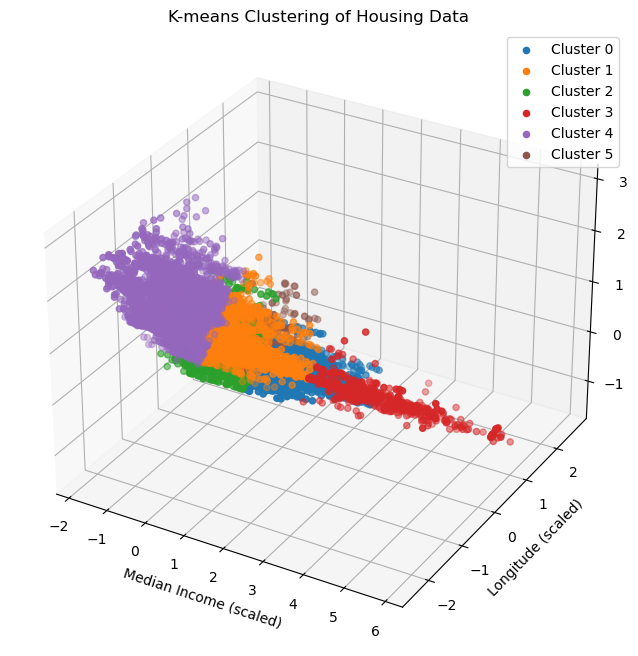

In [33]:
from sklearn.preprocessing import StandardScaler

selected_attributes = ['MedInc', 'Longitude', 'Latitude']
X = data2[selected_attributes]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  k-means clustering with k=6

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#  the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(6):
    cluster_points = X_scaled[clusters == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster_label}')

ax.set_xlabel('Median Income (scaled)')
ax.set_ylabel('Longitude (scaled)')
ax.set_zlabel('Latitude (scaled)')
ax.set_title('K-means Clustering of Housing Data')
ax.legend()

plt.show()

/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

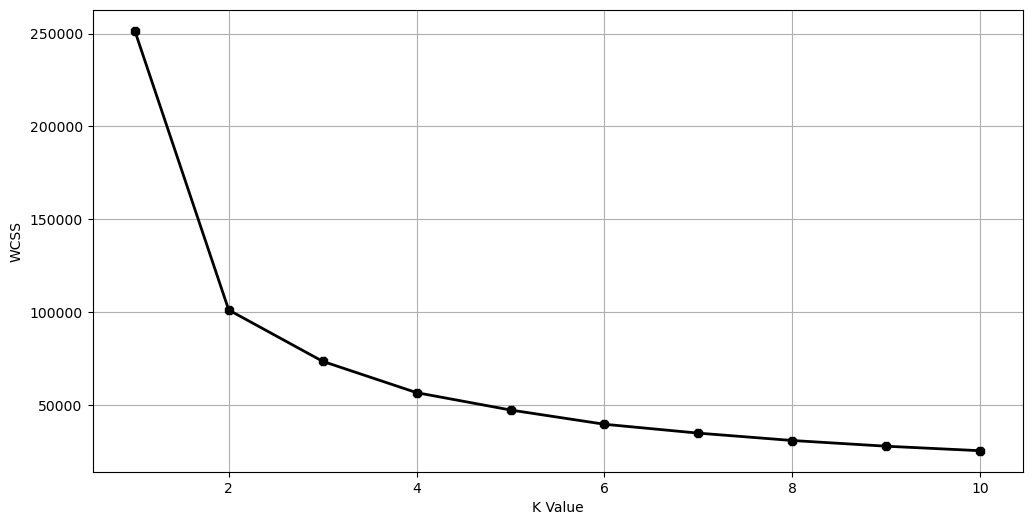

In [34]:
selected_ATT = data2[['MedInc','Longitude', 'Latitude']]
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(selected_ATT)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="black",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### Conclusion: According to the Elbow-Method, we can see the optimal number of clusters is 2. 

In [ ]:
selected_ATT = data2[['MedInc','Longitude', 'Latitude']]
silhouette_scores = []
for i in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(selected_ATT)
    silhouette_avg = silhouette_score(selected_ATT, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Coefficient scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Coefficient for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/masoomeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

### Conclusion: The above graph shows Silhouette coefficient for different values of k. We observed that for k=2, Silhouette coefficient is closer to 1 that shows  good quality clusters with objects well-matched to its own cluster.